# Shanghai pollutant data prediction using LSTM Regularized matrix Factorization
> About the author: Jinming Yang (yangjm67@sjtu.edu.cn), Center for Intelligent Transportation Systems and Unmanned Aerial Systems Applications Research, School of Naval Architecture, Ocean and Civil Engineering, Shanghai Jiao Tong University, Shanghai 200240, China. 

## Data Organization: Matrix Structure

We consider a dataset of $M$ discrete time series $\boldsymbol{y}_{i}\in\mathbb{R}^{T},i\in\left\{1,2,...,M\right\}$. The time series may have missing elements. We express spatio-temporal dataset as a matrix $Y\in\mathbb{R}^{M\times T}$ with $M$ rows (e.g., sensors) and $T$ columns (e.g., discrete time slots),

$$Y=\left[ \begin{array}{cccc} y_{11} & y_{12} & \cdots & y_{1T} \\ y_{21} & y_{22} & \cdots & y_{2F} \\ \vdots & \vdots & \ddots & \vdots \\ y_{M1} & y_{M2} & \cdots & y_{MF} \\ \end{array} \right]\in\mathbb{R}^{M\times F}.$$

Pollutant concentration data is organized in a spatial-temporal matrix in which the rows stands for different kinds of pollutants in different locations and collumns stands for each time slots.

## LSTM Regularized Matrix Factorization(LSTM-ReMF)

LSTM Regularized Matrix Factorization (LSTM-ReMF) framework is an approach to incorporate temporal dependencies into matrix factorization models using the well-studied Long-short term memory(LSTM) neural networks to describe temporal dependencies
among temporal feature vectors ${\boldsymbol{x}_t}$ explicitly. Let $f()$ stands for the feed forward process of the LSTM network, then the temporal dependencies can be described as follows:

$$
\boldsymbol{x}'_t = f(\boldsymbol{x}_{t-l_1},\boldsymbol{x}_{t-l_2},...,\boldsymbol{x}_{t-l_d})
$$

Where the lag set $\mathcal{L}=\left\{l_1,l_2,...,l_d\right\}$ (e.g., $\mathcal{L}=\left\{1,2,288\right\}$) indicates  the temporal correlation topology. We further define the LSTM network temporal regularizer as follows:

$$\mathcal{R}_{t}\left(\boldsymbol{X} \right) = \frac{1}{2}\sum_{t=l_d}^n\biggl(\boldsymbol{x}_t - \boldsymbol{x}'_t\biggr)^2$$

where, $var(f)$ stands for the parameters the in LSTM network regularizer, and $f()$ is the feed forward process of the LSTM network regularizer.

Thus, LSTM-ReMF is given by solving
$$
% \begin{aligned}
\min_{W,X,\text{var}(f)} \frac{1}{2}\underbrace{\sum_{(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^T\boldsymbol{x}_{t}\right)^2}_{\text{sum of squared residual errors}} +\frac{\lambda_{w}\eta}{2}\underbrace{\lVert \boldsymbol{W}\rVert^2}_{W-\text{regularizer}} +\frac{\lambda_{x}\eta}{2}\underbrace{\lVert \boldsymbol{X}\rVert^2}_{X-\text{regularizer}} + \underbrace{\frac{\lambda_{x}}{2}\sum_{t=l_d+1}^n\biggl(x_t - f(x_{t-l_1},...,x_{t-l_d}|\text{var}(f))\biggr)^2}_{\text{LSTM network temporal regularizer}}
% \end{aligned}
$$


### Solving the above minimization problem using alternative least square method(ALS)

### Least square for temporal feature vectors $\boldsymbol{x}_t, t = 1, 2, ..., l_d$
To solve temporal embedding $\boldsymbol{x}_t, t = 1, 2, ..., l_d$, we need to solve the following sub-problem.
$$\min_{\boldsymbol{x}_t} f_X(\boldsymbol{x}_t) = \min_{x_t}\frac{1}{2}\sum_{i:(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^\top\boldsymbol{x}_{t}\right)^2+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^\top\boldsymbol{x}_{t}$$

Rewrite the above objective function as follows:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)^\top(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^\top\boldsymbol{x}_{t}
$$

Expand the objective function $f_X(\boldsymbol{x}_t)$ as:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}\biggl(\boldsymbol{x}_t^\top\boldsymbol{w}_i\boldsymbol{w}_i^\top\boldsymbol{x}_t - 2y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t\biggr) + \frac{\lambda_x \eta}{2}\boldsymbol{x}_t^\top\boldsymbol{x}_t + \text{const}
$$

The above equation can be rewitten as:
$$
\begin{aligned}
f_X(\boldsymbol{x}_t) &= \frac{1}{2}\boldsymbol{x}_t^\top\biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top \biggr)\boldsymbol{x}_t - \sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t  + \boldsymbol{x}_t^{\top}\biggl(\frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t + \text{const} \\
~& = \boldsymbol{x}_t^\top\biggl(\frac{1}{2}\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i\biggr)^\top\boldsymbol{x}_t + const
\end{aligned}
$$

Derive the deviation of $f_X(\boldsymbol{x}_t)$ as follows:
$$
f_X'(\boldsymbol{x}_t) = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top+\lambda_x\eta I \biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i\biggr)
$$

Let the derivation equal zero, we can derive the updating equation of $\boldsymbol{x}_t$ as follows:
<span style='color: blue'>
$$\boldsymbol{x}_t = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top+\lambda_x\eta I \biggr)^{-1}\biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i\biggr)$$
</span>

### Least square for temporal feature vector $\boldsymbol{x}_t, t = l_d + 1, l_d + 2, ..., T$
To update temporal feature vector $\boldsymbol{x}_t, t = l_d + 1, l_d + 2, ..., T$, we need to solve the following sub-problem.
$$\min_{\boldsymbol{x}_t} f_X(\boldsymbol{x}_t) = \min_{x_t}\frac{1}{2}\sum_{i:(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^\top\boldsymbol{x}_{t}\right)^2+\frac{\lambda_{x}}{2}\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)^\top\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^T\boldsymbol{x}_{t}$$

Rewrite the above objective function as follows:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)^\top(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t) + \frac{\lambda_{x}}{2}\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)^\top\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^\top\boldsymbol{x}_{t}
$$

Expand the objective function $f_X(\boldsymbol{x}_t)$ as:
$$
f_X(\boldsymbol{x}_t) = \frac{1}{2}\sum_{i:(i,t)\in\Omega}\biggl(\boldsymbol{x}_t^\top\boldsymbol{w}_i\boldsymbol{w}_i^\top\boldsymbol{x}_t - 2y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t\biggr) + \frac{\lambda_x}{2}\biggl(\boldsymbol{x}_t^\top\boldsymbol{x}_t - 2{\boldsymbol{x}'_t}^{\top}\boldsymbol{x}_t\biggr) + \frac{\lambda_x \eta}{2}\boldsymbol{x}_t^\top\boldsymbol{x}_t + \text{const}
$$

The above equation can be rewitten as:
$$
\begin{aligned}
f_X(\boldsymbol{x}_t) &= \frac{1}{2}\boldsymbol{x}_t^\top\biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top \biggr)\boldsymbol{x}_t - \sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i^\top\boldsymbol{x}_t + \boldsymbol{x}_t^\top \biggl(\frac{\lambda_x}{2}I\biggr)\boldsymbol{x}_t - \lambda_x {\boldsymbol{x}'_t}^{\top}\boldsymbol{x}_t + \boldsymbol{x}_t^{\top}\biggl(\frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t + \text{const} \\
~& = \boldsymbol{x}_t^\top\biggl(\frac{1}{2}\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \frac{\lambda_x}{2}I+\frac{\lambda_x\eta}{2}I\biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}'_t\biggr)^\top\boldsymbol{x}_t + const
\end{aligned}
$$

Derive the deviation of $f_X(\boldsymbol{x}_t)$ as follows:
$$
f_X'(\boldsymbol{x}_t) = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \lambda_xI+\lambda_x\eta I \biggr)\boldsymbol{x}_t - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}'_t \biggr)
$$

Let the derivation equal zero, we can derive the updating equation of $\boldsymbol{x}_t$ as follows:
<span style='color: blue'>
$$\boldsymbol{x}_t = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{w}_i\boldsymbol{w}_i^\top + \lambda_xI+\lambda_x\eta I \biggr)^{-1}\biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}'_t \biggr)$$
</span>

### Least square for spatial feature vectors $\boldsymbol{w}_i, i = 1, 2, ..., M$

To update spatial feature vectors $\boldsymbol{w}_i, i = 1, 2, ..., M$, we need to solve the following sub-problem.
$$\min_{\boldsymbol{w}_i} f_W(\boldsymbol{w}_i) = \min_{\boldsymbol{w}_i}\frac{1}{2}\sum_{t:(i,t)\in\Omega}\left(y_{it}-\boldsymbol{w}_{i}^\top\boldsymbol{x}_{t}\right)^2+\frac{\lambda_{w}}{2}\boldsymbol{w}_{i}^T\boldsymbol{w}_{i}$$

Rewrite the above objective function as follows:
$$
f_W(\boldsymbol{w}_i) = \frac{1}{2}\sum_{t:(i,t)\in\Omega}(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)^\top(y_{it} - \boldsymbol{w}_i^\top\boldsymbol{x}_t)+\frac{\lambda_{w}}{2}\boldsymbol{w}_{i}^\top\boldsymbol{w}_{i}
$$

Expand the objective function $f_X(\boldsymbol{x}_t)$ as:
$$
f_W(\boldsymbol{w}_i) = \frac{1}{2}\sum_{t:(i,t)\in\Omega}\biggl(\boldsymbol{w}_i^\top\boldsymbol{x}_t\boldsymbol{x}_t^\top\boldsymbol{w}_i - 2y_{it}\boldsymbol{x}_t^\top\boldsymbol{w}_i\biggr) + \frac{\lambda_w\eta}{2}\boldsymbol{w}_i^\top\boldsymbol{w}_i + \text{const}
$$

The above equation can be rewitten as:
$$
\begin{aligned}
f_W(\boldsymbol{w}_i) &= \frac{1}{2}\boldsymbol{w}_i^\top\biggl(\sum_{t:(i,t)\in\Omega}\boldsymbol{x}_i\boldsymbol{x}_i^\top \biggr)\boldsymbol{w}_i - \sum_{t:(i,t)\in\Omega}y_{it}\boldsymbol{x}_t^\top\boldsymbol{w}_i+ \boldsymbol{w}_i^\top \biggl(\frac{\lambda_w\eta}{2}I\biggr)\boldsymbol{w}_i + \text{const} \\
~& = \boldsymbol{w}_i^\top\biggl(\frac{1}{2}\sum_{t:(i,t)\in\Omega}\boldsymbol{x}_t\boldsymbol{x}_t^\top + \frac{\lambda_w\eta}{2}I\biggr)\boldsymbol{w}_i - \biggl(\sum_{i:(i,t)\in\Omega}y_{it}\boldsymbol{x}_t\biggr)^\top\boldsymbol{w}_i + const
\end{aligned}
$$

Derive the deviation of $f_W(\boldsymbol{w}_i)$ as follows:
$$
f_W'(\boldsymbol{w}_i) = \biggl(\sum_{i:(i,t)\in\Omega}\boldsymbol{x}_t\boldsymbol{x}_t^\top + \lambda_w\eta I\biggr)\boldsymbol{w}_i - \sum_{t:(i,t)\in\Omega}y_{it}\boldsymbol{x}_t
$$

Let the derivation equal zero, we can derive the updating $\boldsymbol{w}_i$ by:
<span style='color: blue'>
$$\boldsymbol{w}_i = \biggl(\sum_{t:(i,t)\in\Omega}\boldsymbol{x}_t\boldsymbol{x}_t^\top + \lambda_w\eta I\biggr)^{-1}\biggl(\sum_{t:(i,t)\in\Omega}y_{it}\boldsymbol{x}_t\biggr)$$
</span>

# Long-short Term Memory(LSTM)
LSTM is actually also a special kind of neural network. The major difference between LSTM and RNN is that LSTM has a special mechanism called **forget gate**. As RNNs do, LSTMs also have **hidden state** that would pass to the next time slot. But not like RNN, iformations are selected through the forget gate and only let through those informations that is usefull. Let see how this would help LSTM get away from gradient vanish or gradient explode.

### Input gate in LSTM
First, the input is squashed between -1 and 1 using a tanh activation function. This can be expressed by:

$$g = tanh(b^g+x_tU^g+y_{t-1}V^g)$$

Where **$U^g$** and **$V^g$** are the weights for the input and previous cell output, respectively, and **$b^g$** is the input bias. Note that the exponents **g** are not a raised power, but rather signify that these are the input weights and bias values (as opposed to the input gate, forget gate, output gate etc.).

This squashed input is then multiplied element-wise by the output of the input gate. The input gate is basically a hidden layer of sigmoid activated nodes, with weighted **$x_t$** and **$y_{t-1}$** input values, which outputs values of between 0 and 1 and when multiplied element-wise by the input determines which inputs are switched on and off. In other words, it is a kind of input filter or gate. The expression for the input gate is:

$$i = \sigma(b^i + x_tU^i+ y_{t-1}V^i)$$

### The hidden state and the forget gate
Forget gate is again a sigmoid activated set of nodes which is element-wise multiplied by the hidden state of the previous moment **$s_{t-1}$** to determine which previous states should be remembered (i.e. forget gate output close to 1) and which should be forgotten (i.e. forget gate output close to 0). This allows the LSTM cell to learn appropriate context. The forget gate is like:

$$f = \sigma(b^f + x_tU^f + y_{t-1}V^i)$$

So the hidden state of the current moment is:

$$s_t = s_{t-1}\circ f + g \circ i$$

Where $\circ$ denotes element-wise multiplication.

### The output gate in LSTM

The final stage of the LSTM cell is the output gate. The output gate has two components – another tanh squashing function and an output sigmoid gating function. The output sigmoid gating function, like the other gating functions in the cell, is multiplied by the squashed state st to determine which values of the state are output from the cell. 

The output gate is like:

$$o = \sigma(b^o + x_tU^o + y_{t-1}V^o)$$

So the final output of the cell is:

$$y_t = tanh(s_t)\circ o$$

In [2]:
import numpy as np
import scipy.io
from numpy.linalg import inv as inv
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import time

In [3]:
def kr_prod(a, b):
    return np.einsum('ir, jr -> ijr', a, b).reshape(a.shape[0] * b.shape[0], -1)

In [4]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])
print(kr_prod(A, B))

[[ 5 12]
 [ 7 16]
 [ 9 20]
 [15 24]
 [21 32]
 [27 40]]


### Load the Shanghai pollutant concentration data set
Shanghai pollutant concentration dataset is stored in a 12 by 6 by 15768 matrix.
- **12** stands for 12 different monitoring stations in Shanghai.
- **6** stands for 6 different kinds of pollutants: NO2 CO PM2.5 PM10 SO2 O3.
- **15768** stands for 15768 hours from 2017-2019.

In [5]:
import scipy.io

tensor = scipy.io.loadmat('../datasets/Shanghai-pollutant-dataset/NTS_tensor.mat')
dense_tensor = tensor['tensor']

print('The shape of the initial dataset is:')
print(dense_tensor.shape)
dim1, dim2, dim3 = dense_tensor.shape
missing_rate = 0.4

# # =============================================================================
# ### Random missing (PM) scenario
# ### Set the PM scenario by:
tensor = scipy.io.loadmat('../datasets/Shanghai-pollutant-dataset/NTS_random_tensor.mat')
random_tensor = tensor['tensor']
binary_tensor = np.ones((dim1, dim2, dim3))
binary_tensor[random_tensor < missing_rate] = 0 

# # =============================================================================
### Non random missing (CM) scenario
# ### Set the CM scenario by:
missing_period = 6 #data missing in continuous [6, 12, 24, 48] hours
# random_array_file = '../datasets/Shanghai-pollutant-dataset/NTS_random_array' + str(missing_period) + '.mat'
# tensor = scipy.io.loadmat(random_array_file)
# random_array = tensor['array'][0]
# dense_tensor = np.random.rand(dim1,dim2,dim3)
# binary_reshape_tensor = np.ones_like(dense_tensor)
# binary_reshape_tensor = binary_reshape_tensor.reshape(dim1,dim2,int(dim3 / missing_period),missing_period)
# pos = np.where(random_array < missing_rate)
# binary_reshape_tensor[:, :, pos, :] = 0
# binary_tensor = binary_reshape_tensor.reshape(dim1, dim2, dim3)
# # =============================================================================

sparse_tensor = np.multiply(dense_tensor, binary_tensor)

sparse_tensor = np.multiply(dense_tensor, binary_tensor)
# print(len(np.where(sparse_mat != dense_mat)[0])/(87 * 15768))

The shape of the initial dataset is:
(12, 6, 15768)


## Create data matrix

In [6]:
dense_tensor = dense_tensor[:, :, 5768:]
sparse_tensor = sparse_tensor[:, :, 5768:]
dim1, dim2, dim3 = sparse_tensor.shape
dense_mat = dense_tensor.reshape([dim1*dim2, dim3])
sparse_mat = sparse_tensor.reshape([dim1*dim2, dim3])
print(sparse_mat.shape)

(72, 10000)


## Problem setting
This work mainly focuses on spatiotemporal data online prediction and impute possible missing entries during real time data observation.

### Creating training set and test set

In [7]:
test_rate = 0.082

train_len = int((1 - test_rate) * sparse_mat.shape[1])
test_len = sparse_mat.shape[1] - train_len
training_set = sparse_mat[:, :train_len]
test_set = sparse_mat[:, train_len:]
print('The size of training set is:')
print(training_set.shape)
print()
print('The size of test set is:')
print(test_set.shape)

The size of training set is:
(72, 9180)

The size of test set is:
(72, 820)


### Saving ground truth(real value)

In [8]:
training_ground_truth = dense_mat[:, :train_len]
test_ground_truth = dense_mat[:, train_len:]
print('The size of training set ground truth is:')
print(training_ground_truth.shape)
print()
print('The size of test set ground truth is:')
print(test_ground_truth.shape)

The size of training set ground truth is:
(72, 9180)

The size of test set ground truth is:
(72, 820)


## Train LSTM-ReMF spatial temporal feature matrices and LSTM coefficients

Bofore moving to the online prediction part of the framework, static data features(spatial feature matrix `W` and temporal feature matrix `X`) and LSTM network coefficients(`var(f)`) should be trained first.

The following function is used to generate training samples for the LSTM neural network:

- `dataset` is the spatial temporal matrix(training data matrix).
- `rate` ranging from $(0, 1]$ stands for the sampling rate.
- `time_lags` stands for the leg set which denotes the temporal correlation topology.

In [9]:
def create_lstm_samples(dataset, time_lags, rate):
    dataX, dataY = [], []
    data_len = dataset.shape[0] - np.max(time_lags)
    t_sample = np.random.choice(data_len, int(rate * data_len))
    
    for t in t_sample:
        a = dataset[t + np.max(time_lags) - time_lags, :][::-1]
        dataX.append(a)
        dataY.append(dataset[t + np.max(time_lags), :])
    return np.array(dataX), np.array(dataY)

The following function creates a LSTM network temporal regularizer. The input layer of the network has `rank` units, the LSTM layer has `rank` units and the full connection layer also has `rank` units.

In [10]:
def lstmmodel(rank, lag_len):
    # create the LSTM network
    model = Sequential()
#     model.add(LSTM(rank, input_shape = (lag_len, rank), return_sequences = True)) # If you need multi-layer LSTM
    model.add(LSTM(rank, input_shape = (lag_len, rank)))
    model.add(Dense(rank))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

## Error calculator
<div class="alert alert-block alert-warning">
<ul>
<li><b><code>mean_absolute_percentage_error</code>:</b> <font color="black">Compute the value of Mean Absolute Percentage Error (MAPE).</font></li>
<li><b><code>root_mean_squared_error</code>:</b> <font color="black">Compute the value of Root Mean Square Error (RMSE).</font></li>
</ul>
</div>

> Note that $$\mathrm{MAPE}=\frac{1}{n} \sum_{i=1}^{n} \frac{\left|y_{i}-\hat{y}_{i}\right|}{y_{i}} \times 100, \quad\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-{y}'_{i}\right)^{2}},$$ where $n$ is the total number of estimated values, and $y_i$ and ${y}'_i$ are the actual value and its estimation, respectively.

In [11]:
def mean_absolute_percentage_error(y_true, y_pred, pos): 
    return np.mean(np.abs((y_true[pos] - y_pred[pos]) / y_true[pos])) * 100
def root_mean_squared_error(y_true, y_pred, pos): 
    return np.sqrt(np.mean(np.square(y_true[pos] - y_pred[pos])))

### LSTM-ReMF training algorithm

The function **LSTM_ReMF** is used to train spatial temporal feature matrices and LSTM network parameters.

- `sparse_mat` is the training set spatial temporal matrix.
- `init` is the initiated hyperparameters of LSTM-ReMF which includes the initiated spatial matrix `W` and the initiated temporal matrix `X`.
- `time_lags` stands for the leg set which denotes the temporal correlation topology.
- `lambda_w`, `lambda_x` and `eta` are regularizer parameters. 
- `sampling rate` is the ratio of data used to train the LSTM-full connection network.
- `maxiter` is the maxiter time.
- `track` is a 0 or 1 parameter that indicates whether to compute errors while training.
- `dense_mat` is the training ground truth without data missing simulation. It is only required when `track` variable is 1.

In [12]:
def LSTM_ReMF(sparse_mat, init, time_lags, lambda_w, lambda_x, eta, sampling_rate, maxiter, track, dense_mat = 0):
    W = init["W"]
    X = init["X"]
    dim1, dim2 = sparse_mat.shape
    binary_mat = np.zeros((dim1,dim2))
    position = np.where((sparse_mat != 0))
    binary_mat[position] = 1
    d = len(time_lags)
    max_lags = np.max(time_lags)
    r = X.shape[1]
    model = lstmmodel(r, d)
    model_reverse = lstmmodel(r, d)
    start_time = time.time()
    if track:
        pos_err = np.where((sparse_mat == 0) & (dense_mat != 0))
    for iters in range(maxiter):
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            vec0 = np.matmul(Xt.T, sparse_mat[i, pos0[0]])
            mat0 = inv(np.matmul(Xt.T, Xt) + lambda_w * eta * np.eye(rank))
            W[i, :] = np.matmul(mat0, vec0) 
        for t in range(dim2):
            pos0 = np.where(sparse_mat[:, t] != 0)
            Wt = W[pos0[0], :]
            if iters == 0 or t < max_lags:
                X[t, :] = np.matmul(inv(np.matmul(Wt.T, Wt) + lambda_x * eta * np.eye(r)), np.matmul(Wt.T, sparse_mat[pos0[0], t]))
            else:
                X_hat = X[t - time_lags, :][::-1]
                X_hat_feed = X_hat[np.newaxis, :, :]
                Qt =  model.predict(X_hat_feed)[0]
                X[t, :] = np.matmul(inv(np.matmul(Wt.T, Wt)
                                           + lambda_x * np.eye(r) + lambda_x * eta * np.eye(r)),
                                       (np.matmul(Wt.T, sparse_mat[pos0[0], t]) + lambda_x * Qt))

        
        if iters == 0:
            lstmX, lstmY = create_lstm_samples(X, time_lags, 1)
            model.fit(lstmX, lstmY, epochs=20, batch_size=50, verbose=0)
        else:
            lstmX, lstmY = create_lstm_samples(X, time_lags, sampling_rate)
            model.fit(lstmX, lstmY, epochs=1, batch_size=200, verbose=0)
        if (iters + 1) % 10 == 0:
            print('Iterations: %d, time cost: %ds'%((iters + 1), (time.time() - start_time)))
            start_time = time.time()
            if track:
                mat_hat = np.matmul(W, X.T)
                mat_hat[position] = sparse_mat[position]
                mat_hat[mat_hat < 0] = 0
                rmse = root_mean_squared_error(dense_mat, mat_hat, pos_err)
                mape = mean_absolute_percentage_error(dense_mat, mat_hat, pos_err)
                print('Imputation RMSE = %.2f'%rmse)
                print('Imputation MAPE = %.2f'%mape)
            print()
#     model.save('model_save\lstm_trained1.h5')
    mat_hat = np.matmul(W, X.T)
    mat_hat[position] = sparse_mat[position]
    mat_hat[mat_hat < 0] = 0
    return mat_hat, W, X, model

### Training process

In [13]:
rank = 60
maxiter = 200
lambda_w = 50
lambda_x = 50
eta = 0.2
sampling_rate = 1.0
# time_lags = np.array([1, 2, 24])
time_lags = np.arange(1, 25, 1)
track = True
dim1, dim2 = training_set.shape
init = {"W": 0.1 * np.random.rand(dim1, rank), "X": 0.1 * np.random.rand(dim2, rank)}
mat_hat, W, X, model = LSTM_ReMF(training_set, init, time_lags, 
                   lambda_w, lambda_x, eta, sampling_rate, maxiter, track, training_ground_truth)

W0726 12:26:27.102354 20164 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iterations: 10, time cost: 207s
Imputation RMSE = 7.94
Imputation MAPE = 23.80

Iterations: 20, time cost: 199s
Imputation RMSE = 7.08
Imputation MAPE = 21.40

Iterations: 30, time cost: 206s
Imputation RMSE = 6.77
Imputation MAPE = 20.44

Iterations: 40, time cost: 212s
Imputation RMSE = 6.60
Imputation MAPE = 19.83

Iterations: 50, time cost: 208s
Imputation RMSE = 6.47
Imputation MAPE = 19.38

Iterations: 60, time cost: 206s
Imputation RMSE = 6.39
Imputation MAPE = 19.09

Iterations: 70, time cost: 203s
Imputation RMSE = 6.33
Imputation MAPE = 18.87

Iterations: 80, time cost: 204s
Imputation RMSE = 6.27
Imputation MAPE = 18.60

Iterations: 90, time cost: 206s
Imputation RMSE = 6.22
Imputation MAPE = 18.41

Iterations: 100, time cost: 202s
Imputation RMSE = 6.19
Imputation MAPE = 18.31

Iterations: 110, time cost: 210s
Imputation RMSE = 6.16
Imputation MAPE = 18.17

Iterations: 120, time cost: 197s
Imputation RMSE = 6.14
Imputation MAPE = 17.96

Iterations: 130, time cost: 194s
Impu

## Online prediction and imputation with Online LSTM-ReMF
In the context of spatiotemporal data online prediction and imputation, LSTM-ReMF takes current observations $\boldsymbol{y}_{t}$ to update the previously predicted temporal feature vector $\boldsymbol{x}'_t$ and impute possible missing entries in real time observation $\boldsymbol{y}_{t}$. Then, LSTM-ReMF use history temporal feature vectors $\boldsymbol{x}_{t +1 - l}, l\in \mathcal{L}$ to make forecast of future temporal feature vecotr $x_{t+1}$. Finally, forecasted temporal feature vector $\boldsymbol{x}_{t+1}$ will be multiplied by spatial embedding $\boldsymbol{W}$ to calculate future data.

Utilize pre-trained spatial feature matrix **W** of size [72, r], pre-trained LSTM coefficients **var(f)**, prestep temporal feature matrix **X0** of size [max(time_lags), r] and observations(may be incomplete) to make predictions of the next time step.

### 1. Current temporal embedding $x_t$ calibration
At time slot $t$, the newly observed data $\boldsymbol{y}_{t}$ comes in, online LSTM-ReMF framework calibrates the previously predicted temporal feature vector $\boldsymbol{x}'_t$. The calibrated temporal feature vector $x_t$ can be derived from the following optimization problem:
$$
\min_{\boldsymbol{x}_{t}} \frac{1}{2}\sum_{i \in\Omega_{t}}\left(y_{i, t}-\boldsymbol{w}_{i}^\top \boldsymbol{x}_{t}\right)^2+\frac{\lambda_{x}}{2}\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)^\top\left(\boldsymbol{x}_{t}-\boldsymbol{x}'_{t}\right)+\frac{\lambda_{x} \eta}{2}\boldsymbol{x}_{t}^T \boldsymbol{x}_{t}
$$
where $\Omega_{t}$ denotes the observed entries in the real time observation $\boldsymbol{y}_{t}$.

This optimizatoin problem can be solved by least square method, the uodating formulation for temporal embeddding $x_t$ can be derived as follows:
$$
\boldsymbol{x}_t = \biggl(\sum_{i\in\Omega_t}\boldsymbol{w}_i \boldsymbol{w}_i^\top + \lambda_x I+\lambda_x\eta I \biggr)^{-1}\biggl(\sum_{i\in\Omega_t}y_{i,t}\boldsymbol{w}_i + \lambda_x \boldsymbol{x}'_t \biggr)
$$

### 2. Missing data imputation in current observation $\boldsymbol{y}_{t}$
With calibrated temporal feature vector $\boldsymbol{x}_{t}$ and the pre-trained spatial feature matrix $\boldsymbol{W}$, we can make imputation of the current observation by:
$$
\hat{\boldsymbol{y}} = \boldsymbol{W}^\top \boldsymbol{x}_{t}
$$

### 3. Future temporal embedding $\boldsymbol{x}_{t+1}$ prediction
Making forecast of future temporal feature vector $\boldsymbol{x}_{t+1}$.
$$
\boldsymbol{x}'_{t + 1} = f(\boldsymbol{x}_{t + 1 - l_1},\boldsymbol{x}_{t + 1 - l_2},...,\boldsymbol{x}_{t + 1 -l_d})
$$

### 4. Future data predction
With dynamically calculated temporal feature vector $\boldsymbol{x}_{t+1}$ and the pre-trained spatial feature matrix $\boldsymbol{W}$, we can make prediction of the spatial temporal data of the next time slots as follows:
$$
\boldsymbol{y}'_{(t+1)} = \boldsymbol{W}^\top \boldsymbol{x}'_{t+1}
$$


### Online temporal embedding calibration algorithm

In [14]:
def OnlineTRMF(sparse_vec, init, lambda_x, time_lags):
    time_lags = time_lags[::-1]
    W = init["W"]
    X = init["X"]
    model = init["model"]
    dim = sparse_vec.shape[0]
    t, rank = X.shape
    X_hat = X[t - 1 - time_lags, :].copy()
    X_hat_feed = X_hat[np.newaxis, :, :]
    Qt =  model.predict(X_hat_feed)[0]
    pos0 = np.where(sparse_vec != 0)
    Wt = W[pos0[0], :]
    var_mu = np.matmul(Wt.T, sparse_vec[pos0]) + lambda_x * 20000 * Qt
    inv_var_Lambda = inv(np.matmul(Wt.T, Wt) + lambda_x * 20000 * np.eye(rank))
    return np.matmul(inv_var_Lambda, var_mu)

### Online prediction framework

In [15]:
def online_prediction(sparse_mat, init, time_lags, lambda_w, lambda_x, eta, maxiter):
    W = init["W"]
    X = init["X"]
    model = init["model"]
    pre_step_num = X.shape[0]
    rank = X.shape[1]
    dim1, dim2 = sparse_mat.shape
    X_hat = np.zeros((dim2 + pre_step_num, rank))
    mat_pred = np.zeros((dim1, dim2))
    X_hat[:pre_step_num,:] = X.copy()
    start_time = time.time()
    for t in range(dim2):
        if t == 0:
            X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
            X_star_feed = X_star[np.newaxis, :, :]
            Qt =  model.predict(X_star_feed)[0]
            X_hat[pre_step_num + t, :] = Qt.copy()
        else:
            sparse_vec = sparse_mat[:, t - 1]
            if np.where(sparse_vec > 0)[0].shape[0] > 0:
                init = {"W": W, "X": X_hat[pre_step_num + t - np.max(time_lags) - 1 : pre_step_num + t, :],
                        "model": model}
                X_c = OnlineTRMF(sparse_vec, init, lambda_x/dim2, time_lags)
                X_hat[pre_step_num + t - 1, :] = X_c.copy()
                X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
                X_star_feed = X_star[np.newaxis, :, :]
                Qt =  model.predict(X_star_feed)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
            else:
                X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
                X_star_feed = X_star[np.newaxis, :, :]
                Qt =  model.predict(X_star_feed)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
        mat_pred[:, t] = np.matmul(W, X_hat[pre_step_num + t, :])
        if (t + 1) % 1000 == 0:
            print('Time step: %d, time cost: %d s'%((t + 1), (time.time() - start_time)))
            start_time = time.time()
            
    sparse_vec = sparse_mat[:, -1]
    init = {"W": W, "X": X_hat[dim2 + pre_step_num - np.max(time_lags) - 1 : , :], "model": model}
    X_c = OnlineTRMF(sparse_vec, init, lambda_x/dim2, time_lags)
    X_hat[dim2 + pre_step_num - 1,:] = X_c.copy()
    mat_rec = np.matmul(W, X_hat[pre_step_num : , :].T)
    return mat_rec, mat_pred

### Making prediction on test set

In [16]:
import time
start_time = time.time()
init = {"W": W, "X": X[- np.max(time_lags): , :], "model": model}
test_mat_rec, test_mat_pred = online_prediction(test_set, init, time_lags
                                     , lambda_w, lambda_x, eta, maxiter)
print('Shape of imputed data is:')
print(test_mat_rec.shape)
print()
print('Shape of predicted data is:')
print(test_mat_pred.shape)

Shape of imputed data is:
(72, 820)

Shape of predicted data is:
(72, 820)


In [17]:
print('10 first prediciton on test set:')
print(test_mat_pred[0,:10])
print()
print('10 first real value on test set')
print(test_ground_truth[0,:10])

10 first real value on test set
[26.63396653 24.24017627 24.82295617 22.6407249  22.91886624 25.81746045
 25.29435579 26.72869787 30.77082054 32.21177487]

10 first prediciton on test set:
[26. 26. 28. 30. 27. 28. 30. 29. 28. 33.]


### Calculate the prediction and imputation error
RMSE(root mean squared error) and MAPE(mean absolute percentage error) for both prediction and imputation on test set are calculated in the following code:

### Prediction error

In [19]:
# calculate prediction error on training set
# trainPred_rmse = root_mean_squared_error(training_ground_truth[:, np.max(time_lags):], train_mat_pred)
# print('Train prediction RMSE: %.2f RMSE' % (trainPred_rmse))
# trainPred_mape = mean_absolute_percentage_error(training_ground_truth[:, np.max(time_lags):], train_mat_pred)
# print('Train prediction MAPE: %.2f%% MAPE' % (trainPred_mape))
# calculate prediction error on test set
pos = np.where(test_ground_truth != 0)
testPred_rmse = root_mean_squared_error(test_ground_truth, test_mat_pred, pos)
print('Test prediction RMSE: %.2f RMSE' % (testPred_rmse))
testPred_mape = mean_absolute_percentage_error(test_ground_truth, test_mat_pred, pos)
print('Test prediction MAPE: %.2f%% MAPE' % (testPred_mape))

Test prediction RMSE: 7.17 RMSE
Test prediction MAPE: 23.00% MAPE


### Imputation error

In [20]:
pos = np.where((test_ground_truth != 0)&(test_set == 0))
testPred_rmse = root_mean_squared_error(test_ground_truth, test_mat_rec, pos)
print('Test prediction RMSE: %.2f RMSE' % (testPred_rmse))
testPred_mape = mean_absolute_percentage_error(test_ground_truth, test_mat_rec, pos)
print('Test prediction MAPE: %.2f%% MAPE' % (testPred_mape))

Test prediction RMSE: 6.33 RMSE
Test prediction MAPE: 21.00% MAPE


In [27]:
np.save('Shanghai_0.4_PM_pred_lstmremf.npy', test_mat_pred)
np.save('Shanghai_0.4_PM_rec_lstmremf.npy', test_mat_rec)

### Plot prediction results and groud truth

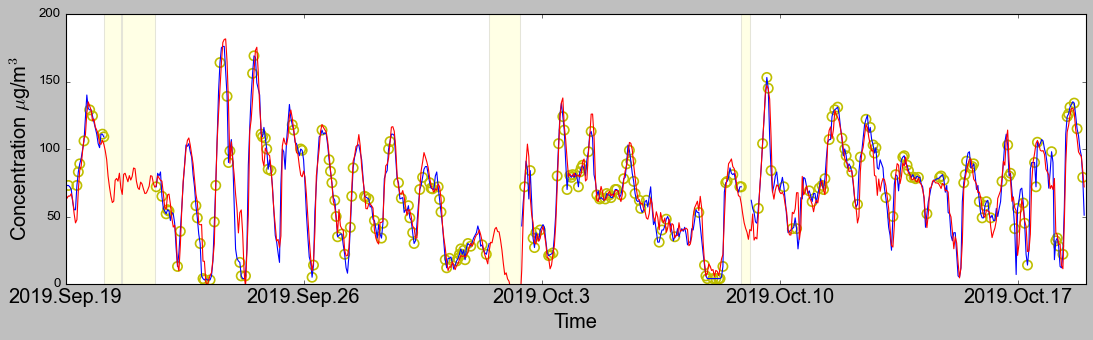

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (15, 4.5))
plt.style.use('classic')
plt.rcParams['font.family'] = 'Arial'
ax = fig.add_axes([0.18, 0.20, 0.85, 0.75])
# ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
# ax.set_facecolor((1.0, 0.47, 0.42))
pollutant = 5 #66#163#35#67
start_time = 100 #3312
end_time = 820 #3528
array = test_ground_truth[pollutant, start_time:end_time]
nonzero = [[]]
pos = np.where(array != 0)
seg = 0
for i in range(len(pos[0])):
    if (i == len(pos[0]) - 1) or (pos[0][i + 1] == pos[0][i] + 1): # continuous
        nonzero[seg].append(pos[0][i])
    if (i != len(pos[0]) - 1) and (pos[0][i + 1] != pos[0][i] + 1): # dis continuous
        nonzero[seg].append(pos[0][i])
        nonzero.append([])
        seg += 1

Scatter_point = []
continuous_seg = []
for i in range(len(nonzero)):
    if len(nonzero[i]) == 1:
        Scatter_point.append(nonzero[i][0])
    else:
        continuous_seg.append(nonzero[i])

for i in range(len(continuous_seg)):
    plt.plot(continuous_seg[i], array[continuous_seg[i]], label = 'concentration', marker='', markerfacecolor='b', markersize=8, color='blue', linewidth=1)
# plt.plot(array[pos], label = 'concentration', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)

# plt.scatter(Scatter_point, array[Scatter_point], facecolors='none', edgecolors='b', s=3)
# plt.plot(test_ground_truth[pollutant, start_time:end_time], label = 'Ground Truth', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
array_ground_truth = test_ground_truth[pollutant, start_time:end_time]
pos = np.where(array_ground_truth == 0)
zero = [[]]
seg = 0
for i in range(len(pos[0])):
    if (i == len(pos[0]) - 1) or (pos[0][i + 1] == pos[0][i] + 1):
        zero[seg].append(pos[0][i])
    if (i != len(pos[0]) - 1) and (pos[0][i + 1] != pos[0][i] + 1):
        zero[seg].append(pos[0][i])
        zero.append([])
        seg += 1

RM = []
NM = []
for i in range(len(zero)):
    if len(zero[i]) == 1:
        RM.append(zero[i][0])
    else:
        NM.append(zero[i])


# plt.yticks(np.arange(0, 150, 40), [0, 40, 80, 120])
# plt.xticks(np.arange(0, 230, 10))#, [0, 50, 100, 150, 200, 250])
plt.ylim(0, 200)
plt.xlim(0, 720)
ax.set_ylabel("Concentration $\mu$g/m$^3$", fontsize=18)
ax.set_xlabel("Time", fontsize=18)
# ax.set_title("Speed prediction for sensor No.%d"%(pollutant))
# ax.grid(color = 'gray', linestyle = '-', linewidth = 0.4, alpha = 0.5, axis = 'x')
# plt.scatter(RM, array[np.array(RM)], facecolors='none', edgecolors='y', s=30)
array_sparse = test_set[pollutant, start_time:end_time]
pos = np.where((array_sparse == 0) & (array_ground_truth != 0))
# print(pos[0])

plt.scatter(pos, array_ground_truth[pos], facecolors='none', edgecolors='y', s=70, linewidth=1.5)
# for i in range(len(pos[0])):
# #     print(pos[i])
#     plt.axvline(x = pos[0][i], ymin = 0, ymax = 200, label='pyplot vertical line', color = 'yellow', linewidth = 0.4)

plt.plot(test_mat_pred[pollutant, start_time : end_time], label = 'Predicted', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)

for i in range(len(NM)):
    ax.add_patch(patches.Rectangle((NM[i][0] - 1, 0), NM[i][-1] - NM[i][0] + 1, 200, alpha = 0.1, facecolor = 'yellow'))
plt.xticks(np.arange(0, 720, 168), ["2019.Sep.19",  "2019.Sep.26", 
                                        "2019.Oct.3", "2019.Oct.10", 
                                   "2019.Oct.17"], fontsize=18)
# plt.legend(loc = 'best')
file_n = 'prediction_shanghai_lstmremf_pm0.4' + '.png'
plt.savefig(file_n, bbox_inches = 'tight')
plt.show()

# License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>